# EDA Liga Mx

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Magic command para mostrar gráficos en el notebook
%matplotlib inline

In [2]:
# --- Cargar el Dataset Procesado ---
file_path = '../data/processed/liga_mx_processed.csv'
df = pd.read_csv(file_path)

In [3]:
print("--- Primeras 5 Filas del Dataset Procesado ---")
display(df.head())

--- Primeras 5 Filas del Dataset Procesado ---


,week,day,date,time,home_team,xgh,score,xga,away_team,attendance,...,calendar,home_goals,away_goals,result,home_avg_goals_scored,home_avg_goals_conceded,home_avg_points,away_avg_goals_scored,away_avg_goals_conceded,away_avg_points
0,6,Fri,2019-08-23,21:00,Santos,1.7,2–1,1.8,Monterrey,"24,012",...,2019-2020,2,1,H,2.4,1.0,2.4,1.6,1.4,1.8
1,6,Fri,2019-08-23,21:00,Morelia,0.2,2–0,0.7,UNAM,"20,477",...,2019-2020,2,0,H,0.8,1.6,0.6,1.2,0.4,1.8
2,6,Sun,2019-08-25,17:00,Guadalajara,1.3,1–2,0.5,Necaxa,"30,912",...,2019-2020,1,2,A,1.8,1.6,1.4,2.2,1.0,1.4
3,6,Sat,2019-08-24,19:00,Pachuca,2.7,3–1,0.4,Atlas,"20,718",...,2019-2020,3,1,H,2.0,2.0,0.8,1.2,1.2,1.8
4,6,Sat,2019-08-24,21:05,UANL,0.8,1–1,0.5,América,"41,589",...,2019-2020,1,1,D,1.8,1.2,2.0,1.8,0.6,2.6


In [4]:
print("\n--- Información General del Dataset ---")
df.info()


--- Información General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   week                     1184 non-null   object 
 1   day                      1184 non-null   object 
 2   date                     1184 non-null   object 
 3   time                     1184 non-null   object 
 4   home_team                1184 non-null   object 
 5   xgh                      1184 non-null   float64
 6   score                    1184 non-null   object 
 7   xga                      1184 non-null   float64
 8   away_team                1184 non-null   object 
 9   attendance               1184 non-null   object 
 10  venue                    1184 non-null   object 
 11  referee                  1184 non-null   object 
 12  match_report_url         1184 non-null   object 
 13  season_type              1184 non-nul

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_1750/2381531582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=df, order=['H', 'D', 'A'], palette='viridis')


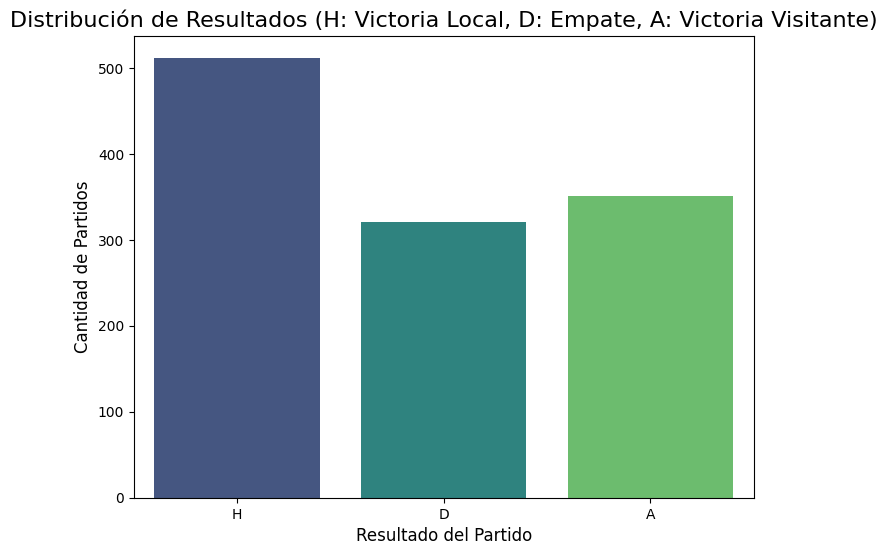

In [5]:
# --- Distribución de Resultados de Partidos ---
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=df, order=['H', 'D', 'A'], palette='viridis')
plt.title('Distribución de Resultados (H: Victoria Local, D: Empate, A: Victoria Visitante)', fontsize=16)
plt.xlabel('Resultado del Partido', fontsize=12)
plt.ylabel('Cantidad de Partidos', fontsize=12)
plt.show()

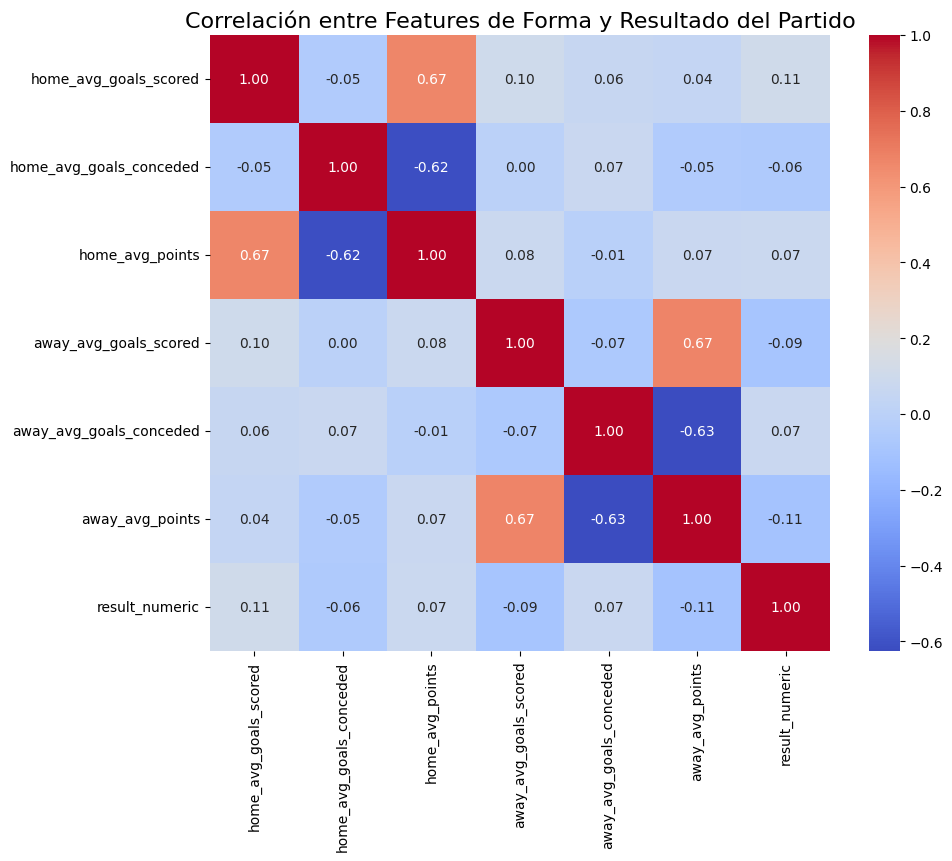

In [6]:
# --- Correlación de Features ---
# Convertimos el resultado a valores numéricos para el heatmap
# H=2, D=1, A=0. Así, un valor más alto indica un mejor resultado para el local.
df['result_numeric'] = df['result'].map({'H': 2, 'D': 1, 'A': 0})

# Seleccionamos solo las columnas numéricas relevantes
numeric_features = [
    'home_avg_goals_scored', 'home_avg_goals_conceded', 'home_avg_points',
    'away_avg_goals_scored', 'away_avg_goals_conceded', 'away_avg_points',
    'result_numeric'
]

corr_matrix = df[numeric_features].corr()

# Creamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Features de Forma y Resultado del Partido', fontsize=16)
plt.show()

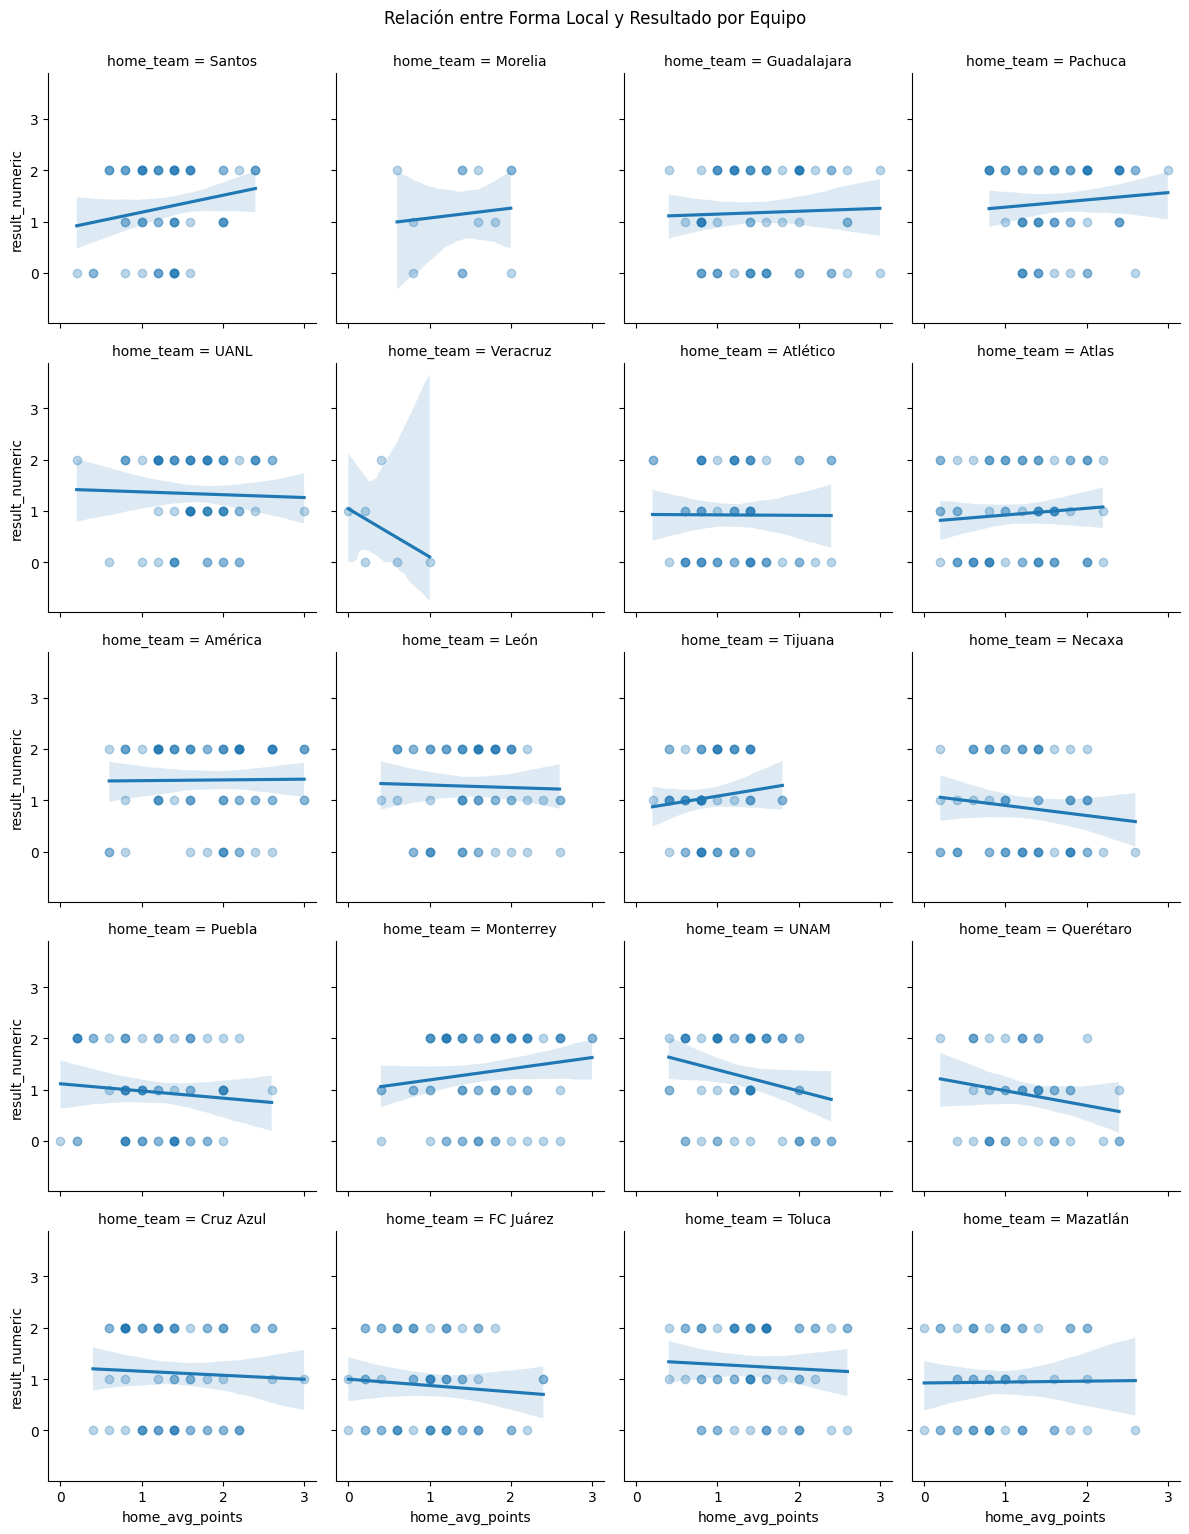

In [9]:
# Usamos lmplot para crear un scatter plot con una línea de regresión para cada equipo
# Esto nos mostrará si la relación "forma -> resultado" es más fuerte para ciertos equipos.
sns.lmplot(x='home_avg_points', y='result_numeric', data=df, col='home_team', col_wrap=4, height=3, scatter_kws={'alpha':0.3})
plt.suptitle('Relación entre Forma Local y Resultado por Equipo', y=1.02)
plt.show()

/var/folders/m1/0y71t71124d1b252nm7stg280000gn/T/ipykernel_1750/1208501432.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='home_advantage', y='team', data=team_points, palette='coolwarm')


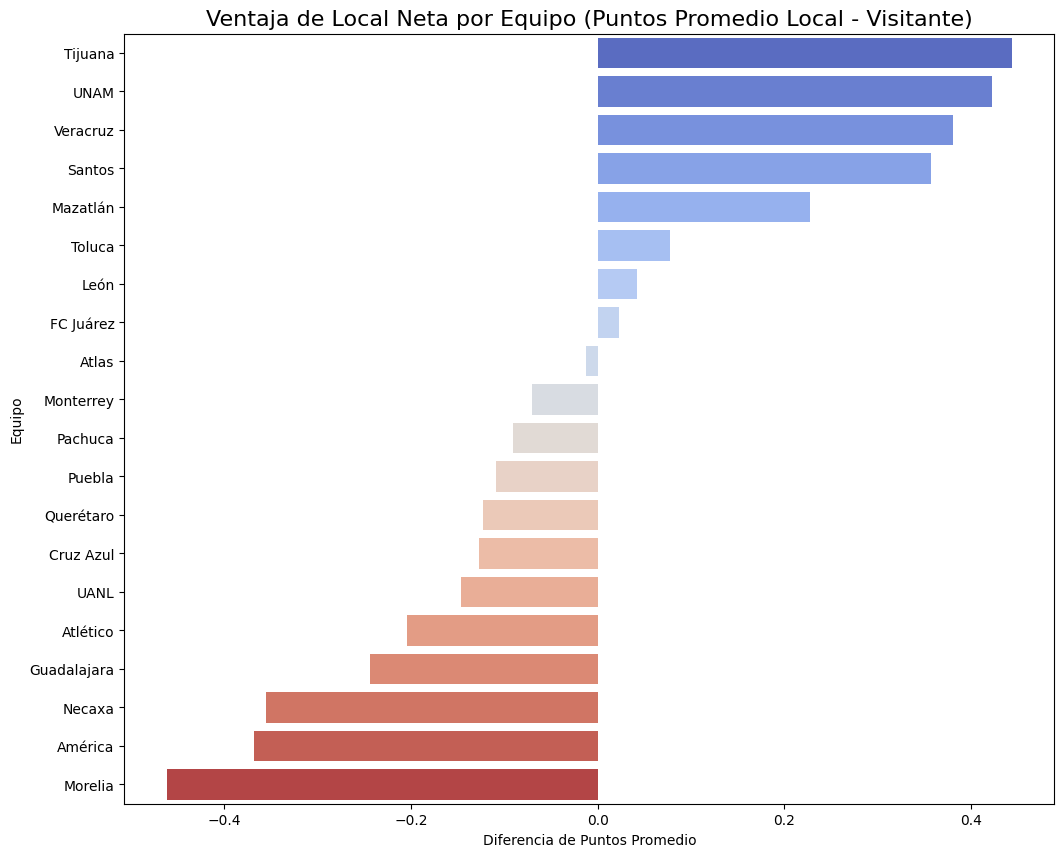

In [12]:
# Calculamos los puntos promedio obtenidos en casa
home_points = df.groupby('home_team')['result_numeric'].mean().reset_index().rename(columns={'home_team':'team', 'result_numeric':'avg_home_points'})

# Calculamos el total de puntos obtenidos fuera
away_points_raw = df.groupby('away_team')['result'].apply(lambda x: (x == 'A').sum() * 3 + (x == 'D').sum() * 1).reset_index(name='total_away_points')

# Contamos el número de partidos jugados fuera
# El DataFrame resultante tendrá las columnas ['away_team', 'away_matches']
away_matches = df['away_team'].value_counts().reset_index(name='away_matches')

# Unimos las tablas de puntos y partidos jugados fuera
# CAMBIO CLAVE AQUÍ: Usamos 'on="away_team"' en lugar de las claves incorrectas.
away_points = away_points_raw.merge(away_matches, on='away_team')

# Calculamos el promedio de puntos fuera
away_points['avg_away_points'] = away_points['total_away_points'] / away_points['away_matches']

# Unimos los promedios de casa y fuera para cada equipo
team_points = home_points.merge(away_points[['away_team', 'avg_away_points']], left_on='team', right_on='away_team')

# Calculamos la ventaja neta de local
team_points['home_advantage'] = team_points['avg_home_points'] - team_points['avg_away_points']
team_points = team_points.sort_values('home_advantage', ascending=False)

# Visualizamos la diferencia
plt.figure(figsize=(12, 10))
sns.barplot(x='home_advantage', y='team', data=team_points, palette='coolwarm')
plt.title('Ventaja de Local Neta por Equipo (Puntos Promedio Local - Visitante)', fontsize=16)
plt.xlabel('Diferencia de Puntos Promedio')
plt.ylabel('Equipo')
plt.show()

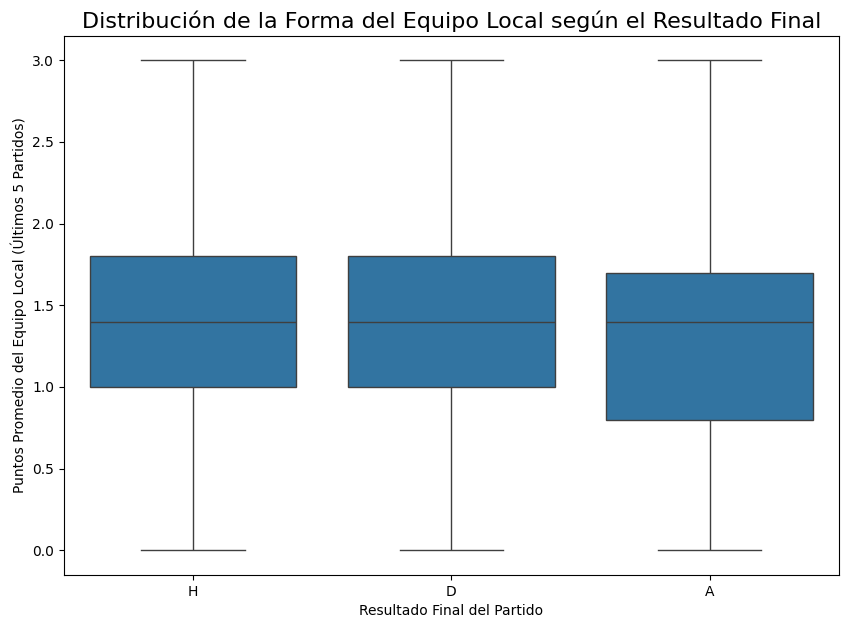

In [11]:
# Usamos un boxplot para ver la distribución de la forma del equipo local para cada tipo de resultado
plt.figure(figsize=(10, 7))
sns.boxplot(x='result', y='home_avg_points', data=df, order=['H', 'D', 'A'])
plt.title('Distribución de la Forma del Equipo Local según el Resultado Final', fontsize=16)
plt.xlabel('Resultado Final del Partido')
plt.ylabel('Puntos Promedio del Equipo Local (Últimos 5 Partidos)')
plt.show()

In [ ]:
x